In [1]:
import pandas as pd
import json

In [2]:
from itertools import chain, starmap

def flatten_json_iterative_solution(dictionary):
    """Flatten a nested json file"""

    def unpack(parent_key, parent_value):
        """Unpack one level of nesting in json file"""
        # Unpack one level only!!!
        
        if isinstance(parent_value, dict):
            for key, value in parent_value.items():
                temp1 = parent_key + '+' + key
                yield temp1, value
        elif isinstance(parent_value, list):
            i = 0 
            for value in parent_value:
                temp2 = parent_key + '+'+str(i) 
                i += 1
                yield temp2, value
        else:
            yield parent_key, parent_value    

            
    # Keep iterating until the termination condition is satisfied
    while True:
        # Keep unpacking the json file until all values are atomic elements (not dictionary or list)
        dictionary = dict(chain.from_iterable(starmap(unpack, dictionary.items())))
        # Terminate condition: not any value in the json file is dictionary or list
        if not any(isinstance(value, dict) for value in dictionary.values()) and \
           not any(isinstance(value, list) for value in dictionary.values()):
            break

    return dictionary

In [3]:
with open('anonymized_project.json') as file_json:
    json_in = json.load(file_json)
    dict_out = flatten_json_iterative_solution(json_in)
    df = pd.DataFrame([dict_out])
    df.shape

In [4]:
print(df.shape)
print(df.head(30))

(1, 1372138)
  results+root_node+gui_type  \
0            discrete_answer   

  results+root_node+results+7e8984b6-dff7-4015-865a-b721a2faf681+results+0+task_input+image_url  \
0  https://qm-auto-annotator.s3.eu-central-1.amaz...                                              

  results+root_node+results+7e8984b6-dff7-4015-865a-b721a2faf681+results+0+created_at  \
0                   2021-02-25T14:08:11.319438+00:00                                    

   results+root_node+results+7e8984b6-dff7-4015-865a-b721a2faf681+results+0+workpackage_total_size  \
0                                                  5                                                 

   results+root_node+results+7e8984b6-dff7-4015-865a-b721a2faf681+results+0+loss  \
0                                                0.0                               

  results+root_node+results+7e8984b6-dff7-4015-865a-b721a2faf681+results+0+project_node_input_id  \
0               7e8984b6-dff7-4015-865a-b721a2faf681                  

In [5]:
list_column_names = ['task_input+image_url', 'created_at', 'answer', 'cant_solve', 'corrupt_data', 'duration_ms', 'vendor_user_id']
series= []

In [6]:
for column_name in list_column_names:
    df_1 = df.loc[:, df.columns.str.endswith(column_name)].transpose()
    df_1 = df_1.reset_index(drop=True)
    column = df_1.loc[:,0]
    column.name = column_name
    series.append(column)
    
    
    print(column.shape)
    print(column.head(10))
    print(column.tail(10))
    print(len(series))

(90870,)
0    https://qm-auto-annotator.s3.eu-central-1.amaz...
1    https://qm-auto-annotator.s3.eu-central-1.amaz...
2    https://qm-auto-annotator.s3.eu-central-1.amaz...
3    https://qm-auto-annotator.s3.eu-central-1.amaz...
4    https://qm-auto-annotator.s3.eu-central-1.amaz...
5    https://qm-auto-annotator.s3.eu-central-1.amaz...
6    https://qm-auto-annotator.s3.eu-central-1.amaz...
7    https://qm-auto-annotator.s3.eu-central-1.amaz...
8    https://qm-auto-annotator.s3.eu-central-1.amaz...
9    https://qm-auto-annotator.s3.eu-central-1.amaz...
Name: task_input+image_url, dtype: object
90860    https://qm-auto-annotator.s3.eu-central-1.amaz...
90861    https://qm-auto-annotator.s3.eu-central-1.amaz...
90862    https://qm-auto-annotator.s3.eu-central-1.amaz...
90863    https://qm-auto-annotator.s3.eu-central-1.amaz...
90864    https://qm-auto-annotator.s3.eu-central-1.amaz...
90865    https://qm-auto-annotator.s3.eu-central-1.amaz...
90866    https://qm-auto-annotator.s3.eu-cent

In [7]:
new_df = pd.concat(series, axis=1)
new_df.columns = list_column_names
print(new_df.shape)
print(new_df.head(10))

(90870, 7)
                                task_input+image_url  \
0  https://qm-auto-annotator.s3.eu-central-1.amaz...   
1  https://qm-auto-annotator.s3.eu-central-1.amaz...   
2  https://qm-auto-annotator.s3.eu-central-1.amaz...   
3  https://qm-auto-annotator.s3.eu-central-1.amaz...   
4  https://qm-auto-annotator.s3.eu-central-1.amaz...   
5  https://qm-auto-annotator.s3.eu-central-1.amaz...   
6  https://qm-auto-annotator.s3.eu-central-1.amaz...   
7  https://qm-auto-annotator.s3.eu-central-1.amaz...   
8  https://qm-auto-annotator.s3.eu-central-1.amaz...   
9  https://qm-auto-annotator.s3.eu-central-1.amaz...   

                         created_at answer  cant_solve  corrupt_data  \
0  2021-02-25T14:08:11.319438+00:00     no       False         False   
1  2021-02-25T13:14:39.411149+00:00     no       False         False   
2  2021-02-25T15:19:57.889434+00:00     no       False         False   
3  2021-02-26T03:56:18.770331+00:00     no       False         False   
4  2021-02-2

In [8]:
print(new_df.isna().sum())
import numpy as np
#new_df = new_df.replace('', np.nan)
#print(new_df.isna().sum())

task_input+image_url    0
created_at              0
answer                  0
cant_solve              0
corrupt_data            0
duration_ms             0
vendor_user_id          0
dtype: int64


In [9]:
#Answer to 1a
print(new_df.vendor_user_id.nunique())

22


In [10]:
#Answer 1b
print(new_df.duration_ms.dtype) 
print(new_df.describe()) #1b

int64
        duration_ms
count  90870.000000
mean    1284.333873
std     1351.960465
min   -99999.000000
25%      887.000000
50%     1058.000000
75%     1328.000000
max    42398.000000


In [11]:
neg_dur_df = new_df[(new_df['duration_ms']<0)]
print(neg_dur_df)

                                   task_input+image_url  \
684   https://qm-auto-annotator.s3.eu-central-1.amaz...   
782   https://qm-auto-annotator.s3.eu-central-1.amaz...   
1312  https://qm-auto-annotator.s3.eu-central-1.amaz...   
1517  https://qm-auto-annotator.s3.eu-central-1.amaz...   
1826  https://qm-auto-annotator.s3.eu-central-1.amaz...   

                            created_at answer  cant_solve  corrupt_data  \
684   2021-02-25T08:33:12.881250+00:00     no       False         False   
782   2021-02-25T08:36:04.711558+00:00    yes       False         False   
1312  2021-02-25T08:35:56.232698+00:00    yes       False         False   
1517  2021-02-25T08:36:21.781619+00:00     no       False         False   
1826  2021-02-25T08:36:14.010629+00:00    yes       False         False   

      duration_ms vendor_user_id  
684        -99999   annotator_19  
782        -99999   annotator_19  
1312       -99999   annotator_19  
1517       -99999   annotator_19  
1826       -99999  

In [12]:
new_df['duration_ms']=new_df['duration_ms'].mask(new_df['duration_ms']<0)
print(new_df[(new_df['duration_ms']<0)])
print(new_df.describe())
print(new_df.shape) #updated 1b answer once we replace negative values with NaN

Empty DataFrame
Columns: [task_input+image_url, created_at, answer, cant_solve, corrupt_data, duration_ms, vendor_user_id]
Index: []
        duration_ms
count  90865.000000
mean    1289.907159
std     1124.001502
min        0.000000
25%      887.000000
50%     1058.000000
75%     1328.000000
max    42398.000000
(90870, 7)


In [13]:
print(new_df.isna().sum())

task_input+image_url    0
created_at              0
answer                  0
cant_solve              0
corrupt_data            0
duration_ms             5
vendor_user_id          0
dtype: int64


In [14]:
#Answer to 1c
print(new_df.vendor_user_id.value_counts()) 

annotator_02    7596
annotator_13    7078
annotator_08    6537
annotator_11    6436
annotator_04    6421
annotator_12    6210
annotator_20    6126
annotator_15    6088
annotator_06    5337
annotator_18    5170
annotator_16    5061
annotator_09    4860
annotator_17    3485
annotator_05    3475
annotator_21    2950
annotator_07    2175
annotator_22    1745
annotator_14    1725
annotator_01    1280
annotator_03     630
annotator_10     315
annotator_19     170
Name: vendor_user_id, dtype: int64


In [15]:
#Solution for 1d
new_df['task_input+image_url'] = new_df['task_input+image_url'].astype(str)
print(new_df['task_input+image_url'].dtype)
new_df['image'] = new_df['task_input+image_url'].str.split('/').str[-1]
new_df = new_df.drop(['task_input+image_url'], axis = 1)
print(new_df['image'].head(30))
print(new_df.shape)
print(new_df.head(20))

object
0     img_4686.jpg
1     img_4686.jpg
2     img_4686.jpg
3     img_4686.jpg
4     img_4686.jpg
5     img_4686.jpg
6     img_4686.jpg
7     img_4686.jpg
8     img_4686.jpg
9     img_4686.jpg
10    img_8607.jpg
11    img_8607.jpg
12    img_8607.jpg
13    img_8607.jpg
14    img_8607.jpg
15    img_8607.jpg
16    img_8607.jpg
17    img_8607.jpg
18    img_8607.jpg
19    img_8607.jpg
20    img_5541.jpg
21    img_5541.jpg
22    img_5541.jpg
23    img_5541.jpg
24    img_5541.jpg
25    img_5541.jpg
26    img_5541.jpg
27    img_5541.jpg
28    img_5541.jpg
29    img_5541.jpg
Name: image, dtype: object
(90870, 7)
                          created_at answer  cant_solve  corrupt_data  \
0   2021-02-25T14:08:11.319438+00:00     no       False         False   
1   2021-02-25T13:14:39.411149+00:00     no       False         False   
2   2021-02-25T15:19:57.889434+00:00     no       False         False   
3   2021-02-26T03:56:18.770331+00:00     no       False         False   
4   2021-02-25T15:39

In [16]:
disagree_df = new_df.groupby('image')['answer'].describe()
disagree_df = disagree_df.reset_index()
print(disagree_df)
slice = disagree_df.loc[disagree_df['unique']==disagree_df['unique'].max()]
print(slice) #1d (potentially to not replace NaNs innthe beginning, then question 2451 would be the answer)



             image count unique  top freq
0     img_0000.jpg    10      2   no    7
1     img_0001.jpg    10      1   no   10
2     img_0002.jpg    10      1   no   10
3     img_0003.jpg    10      1   no   10
4     img_0004.jpg    10      1  yes   10
...            ...   ...    ...  ...  ...
9082  img_9082.jpg    10      1   no   10
9083  img_9083.jpg    10      1   no   10
9084  img_9084.jpg    10      1  yes   10
9085  img_9085.jpg    10      1   no   10
9086  img_9086.jpg    10      1   no   10

[9087 rows x 5 columns]
             image count unique top freq
2451  img_2451.jpg    10      3  no    7


In [17]:
second_best = disagree_df.loc[disagree_df['unique']==2]
print(second_best)
print(second_best['freq'].min())
final_slice = second_best.loc[second_best['freq']==second_best['freq'].min()]
print(final_slice) #1d additional
print(final_slice.image.unique())

             image count unique  top freq
0     img_0000.jpg    10      2   no    7
6     img_0006.jpg    10      2   no    9
9     img_0009.jpg    10      2   no    6
10    img_0010.jpg    10      2   no    9
12    img_0012.jpg    10      2   no    9
...            ...   ...    ...  ...  ...
9054  img_9054.jpg    10      2  yes    6
9062  img_9062.jpg    10      2   no    9
9065  img_9065.jpg    10      2   no    8
9068  img_9068.jpg    10      2   no    9
9071  img_9071.jpg    10      2   no    9

[1717 rows x 5 columns]
5
             image count unique  top freq
391   img_0391.jpg    10      2   no    5
490   img_0490.jpg    10      2   no    5
627   img_0627.jpg    10      2   no    5
666   img_0666.jpg    10      2  yes    5
669   img_0669.jpg    10      2   no    5
...            ...   ...    ...  ...  ...
7701  img_7701.jpg    10      2  yes    5
8397  img_8397.jpg    10      2  yes    5
8812  img_8812.jpg    10      2  yes    5
8819  img_8819.jpg    10      2   no    5
8894  i

In [19]:
checkpoint = new_df.loc[new_df['image'] =='img_2451.jpg']
print(checkpoint['answer'])

47480    yes
47481     no
47482     no
47483     no
47484     no
47485       
47486     no
47487     no
47488     no
47489    yes
Name: answer, dtype: object


In [20]:
new_df = new_df.replace('', np.nan)
print(new_df.isna().sum())

created_at         0
answer            21
cant_solve         0
corrupt_data       0
duration_ms        5
vendor_user_id     0
image              0
dtype: int64


In [21]:
#Solution to 2a
print(new_df['cant_solve'].value_counts())
print(new_df['corrupt_data'].value_counts())

False    90853
True        17
Name: cant_solve, dtype: int64
False    90866
True         4
Name: corrupt_data, dtype: int64


In [22]:
undecided_df = new_df.loc[new_df['cant_solve'] | new_df['corrupt_data']  == True]
print(undecided_df)

                             created_at answer  cant_solve  corrupt_data  \
2742   2021-02-25T13:50:48.203614+00:00    NaN        True         False   
3943   2021-02-25T15:17:09.468249+00:00    NaN        True         False   
4194   2021-02-25T14:48:27.963058+00:00    NaN       False          True   
7413   2021-02-26T03:38:22.398688+00:00    NaN        True         False   
7733   2021-02-25T17:58:23.095451+00:00    NaN       False          True   
11008  2021-02-26T02:33:19.119928+00:00    NaN        True         False   
15243  2021-02-25T14:07:25.877275+00:00    NaN        True         False   
15738  2021-02-25T13:54:03.766952+00:00    NaN        True         False   
19432  2021-02-25T13:56:28.278248+00:00    NaN        True         False   
22669  2021-02-26T04:00:43.982528+00:00    NaN       False          True   
47485  2021-02-25T18:34:53.405955+00:00    NaN        True         False   
47867  2021-02-25T13:40:07.647516+00:00    NaN        True         False   
48951  2021-

In [23]:
print(undecided_df['vendor_user_id'].value_counts())

annotator_22    4
annotator_04    4
annotator_18    3
annotator_08    3
annotator_02    2
annotator_11    1
annotator_06    1
annotator_07    1
annotator_14    1
annotator_20    1
Name: vendor_user_id, dtype: int64


In [24]:
undecided_annotators = undecided_df['vendor_user_id'].unique().tolist()
print(undecided_annotators)
undecided_annotators_df = new_df.loc[new_df['vendor_user_id'].isin(undecided_annotators)]
print(undecided_annotators_df.shape)
print(undecided_annotators_df.head(10))

['annotator_18', 'annotator_22', 'annotator_11', 'annotator_06', 'annotator_07', 'annotator_04', 'annotator_08', 'annotator_14', 'annotator_02', 'annotator_20']
(49268, 7)
                          created_at answer  cant_solve  corrupt_data  \
1   2021-02-25T13:14:39.411149+00:00     no       False         False   
2   2021-02-25T15:19:57.889434+00:00     no       False         False   
4   2021-02-25T15:39:06.644705+00:00     no       False         False   
6   2021-02-26T03:36:13.509392+00:00     no       False         False   
9   2021-02-25T12:12:32.369825+00:00     no       False         False   
10  2021-02-25T13:53:31.698130+00:00    yes       False         False   
11  2021-02-25T15:28:05.979085+00:00    yes       False         False   
13  2021-02-26T04:03:32.210114+00:00    yes       False         False   
14  2021-02-25T12:56:46.575301+00:00    yes       False         False   
18  2021-02-26T03:46:57.798331+00:00    yes       False         False   

    duration_ms vendor_u

In [25]:
print(undecided_annotators_df.describe())
print(new_df.describe())

        duration_ms
count  49268.000000
mean    1316.140822
std     1209.427360
min        0.000000
25%      887.000000
50%     1070.000000
75%     1351.000000
max    42398.000000
        duration_ms
count  90865.000000
mean    1289.907159
std     1124.001502
min        0.000000
25%      887.000000
50%     1058.000000
75%     1328.000000
max    42398.000000


In [26]:
undecided_annotators_answers_df = undecided_annotators_df['vendor_user_id'].value_counts().to_frame()
print(undecided_annotators_df['vendor_user_id'].value_counts())
print(undecided_annotators_answers_df)

annotator_02    7596
annotator_08    6537
annotator_11    6436
annotator_04    6421
annotator_20    6126
annotator_06    5337
annotator_18    5170
annotator_07    2175
annotator_22    1745
annotator_14    1725
Name: vendor_user_id, dtype: int64
              vendor_user_id
annotator_02            7596
annotator_08            6537
annotator_11            6436
annotator_04            6421
annotator_20            6126
annotator_06            5337
annotator_18            5170
annotator_07            2175
annotator_22            1745
annotator_14            1725


In [27]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns 
sns.set()

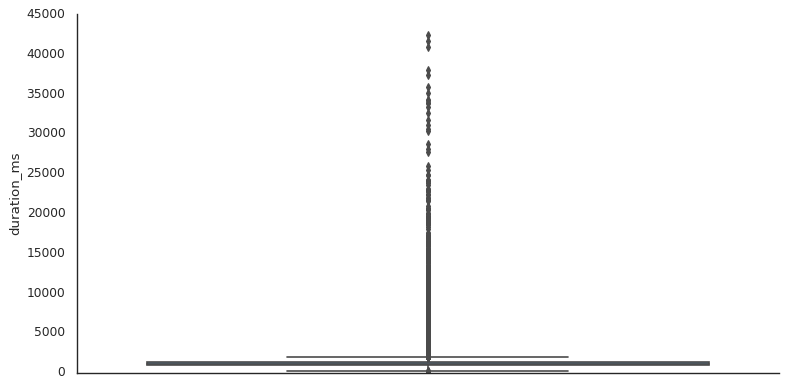

In [28]:
with sns.axes_style('white'):
    g = sns.catplot(y="duration_ms", data=new_df, aspect=2,
                       kind = 'box', color='steelblue')

1289.9071589721016
1058.0


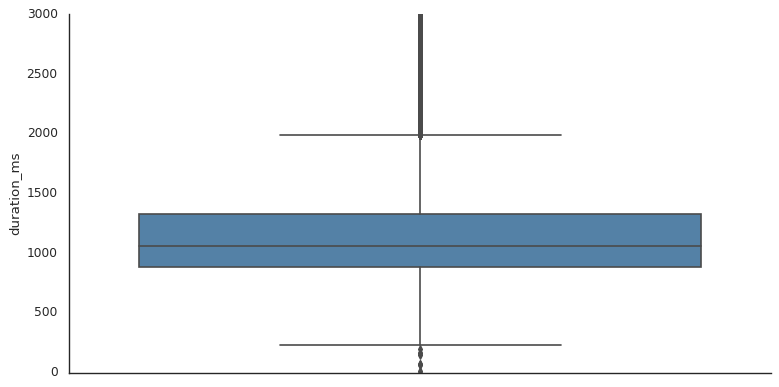

In [29]:
with sns.axes_style('white'):
    g = sns.catplot(y="duration_ms", data=new_df, aspect=2,
                       kind = 'box', color='steelblue')
    plt.ylim(0, 3000)
print(new_df['duration_ms'].mean())
print(new_df['duration_ms'].median())
    

In [30]:
duration_undecided_df = undecided_annotators_df.groupby(['vendor_user_id'])['duration_ms'].mean().to_frame()
duration_undecided_df.columns = ['vendor_user_id']
duration_undecided_df = duration_undecided_df.reindex_like(undecided_annotators_answers_df)
print(duration_undecided_df)

              vendor_user_id
annotator_02     1178.170090
annotator_08     1434.512926
annotator_11     1279.910659
annotator_04     1113.926958
annotator_20     1173.149200
annotator_06     1496.659734
annotator_18     1592.582205
annotator_07     1578.362299
annotator_22      879.434957
annotator_14     1594.908986


In [31]:

no_annotation_frequency_df = undecided_df['vendor_user_id'].value_counts().to_frame()
print(no_annotation_frequency_df)

              vendor_user_id
annotator_22               4
annotator_04               4
annotator_18               3
annotator_08               3
annotator_02               2
annotator_11               1
annotator_06               1
annotator_07               1
annotator_14               1
annotator_20               1


In [32]:
duration_undecided_annotators_df = undecided_annotators_df[['duration_ms']].copy().set_index(undecided_annotators_df['vendor_user_id'])
print(duration_undecided_annotators_df)

                duration_ms
vendor_user_id             
annotator_11          845.0
annotator_22         1468.0
annotator_02          879.0
annotator_11         3840.0
annotator_20          942.0
...                     ...
annotator_18         1000.0
annotator_02         1230.0
annotator_08         1130.0
annotator_04         1306.0
annotator_06         1311.0

[49268 rows x 1 columns]


In [33]:
no_annotation_frequency_df = no_annotation_frequency_df.reindex_like(undecided_annotators_answers_df)
print(no_annotation_frequency_df)

              vendor_user_id
annotator_02               2
annotator_08               3
annotator_11               1
annotator_04               4
annotator_20               1
annotator_06               1
annotator_18               3
annotator_07               1
annotator_22               4
annotator_14               1


In [34]:
answers_no_annotation_df = pd.concat([undecided_annotators_answers_df, no_annotation_frequency_df, duration_undecided_df], axis = 1).reset_index()
answers_no_annotation_df.columns = ['vendor_user_id','answers_count', 'no_annotation_count', 'duration_mean_ms']
print(answers_no_annotation_df)

  vendor_user_id  answers_count  no_annotation_count  duration_mean_ms
0   annotator_02           7596                    2       1178.170090
1   annotator_08           6537                    3       1434.512926
2   annotator_11           6436                    1       1279.910659
3   annotator_04           6421                    4       1113.926958
4   annotator_20           6126                    1       1173.149200
5   annotator_06           5337                    1       1496.659734
6   annotator_18           5170                    3       1592.582205
7   annotator_07           2175                    1       1578.362299
8   annotator_22           1745                    4        879.434957
9   annotator_14           1725                    1       1594.908986


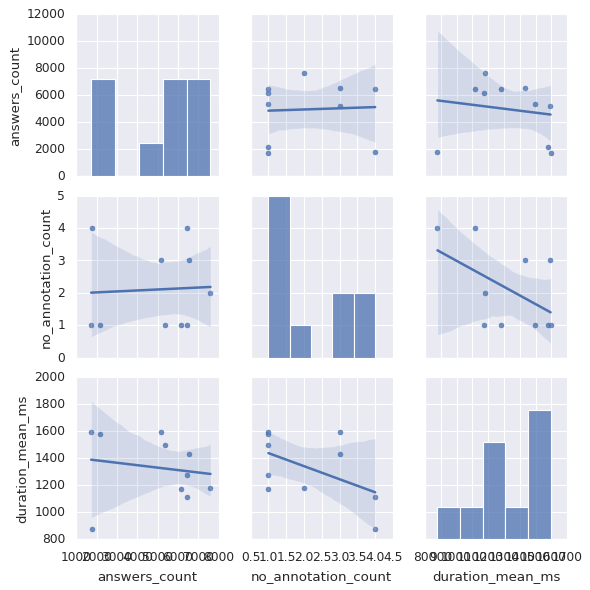

In [36]:
sns.pairplot(answers_no_annotation_df, kind="reg") #answer 2

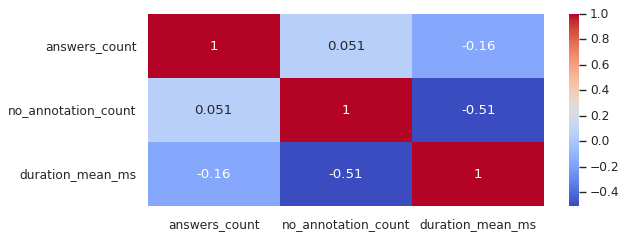

In [37]:
plt.figure(figsize=(8,3))
sns.set_theme(style="white")
corr = answers_no_annotation_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm") #answer2# moderate-strong negative correlation between duration_ms and number of not annotated images

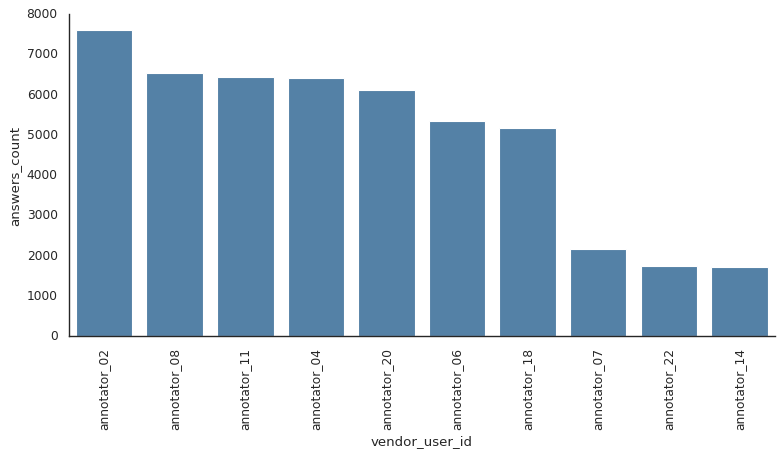

In [38]:
with sns.axes_style('white'):
    g = sns.catplot(x="vendor_user_id", y="answers_count", data=answers_no_annotation_df, aspect=2,
                       kind = 'bar', color='steelblue')
    g.set_xticklabels(rotation = 90)

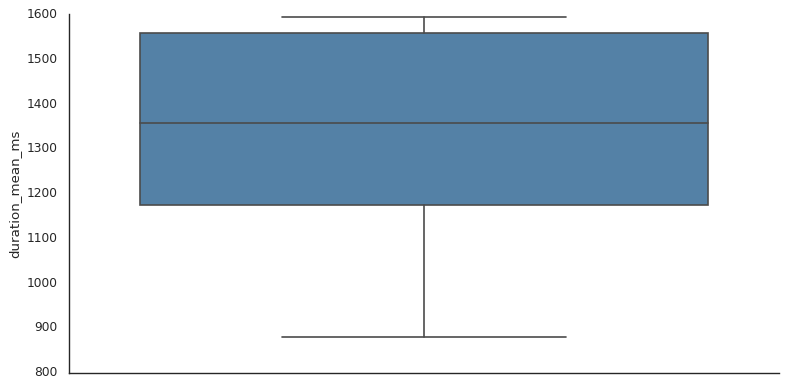

In [39]:
with sns.axes_style('white'):
    g = sns.catplot(y="duration_mean_ms", data=answers_no_annotation_df, aspect=2,
                       kind = 'box', color='steelblue')

In [40]:
#answer 3
ref_df = pd.read_json('references.json')
print(ref_df.shape)
print(ref_df.head(10))

(1, 9087)
            img_4686  img_8607  img_5541  img_3218  img_3247  img_1876  \
is_bicycle     False      True     False     False      True      True   

            img_6228  img_4653  img_5488  img_8591  ...  img_3563  img_7393  \
is_bicycle      True     False      True     False  ...      True     False   

            img_7061  img_6877  img_2192  img_5282  img_0628  img_7736  \
is_bicycle     False      True      True      True      True      True   

            img_1042  img_2866  
is_bicycle     False      True  

[1 rows x 9087 columns]


In [41]:
ref_df = ref_df.transpose().reset_index()
print(ref_df.head(10))

      index  is_bicycle
0  img_4686       False
1  img_8607        True
2  img_5541       False
3  img_3218       False
4  img_3247        True
5  img_1876        True
6  img_6228        True
7  img_4653       False
8  img_5488        True
9  img_8591       False


In [42]:
ref_df.columns = ['image', 'is_bicycle']
print(ref_df.head(10))


      image  is_bicycle
0  img_4686       False
1  img_8607        True
2  img_5541       False
3  img_3218       False
4  img_3247        True
5  img_1876        True
6  img_6228        True
7  img_4653       False
8  img_5488        True
9  img_8591       False


   index  is_bicycle
0   True        4586
1  False        4501


<AxesSubplot:xlabel='index', ylabel='is_bicycle'>

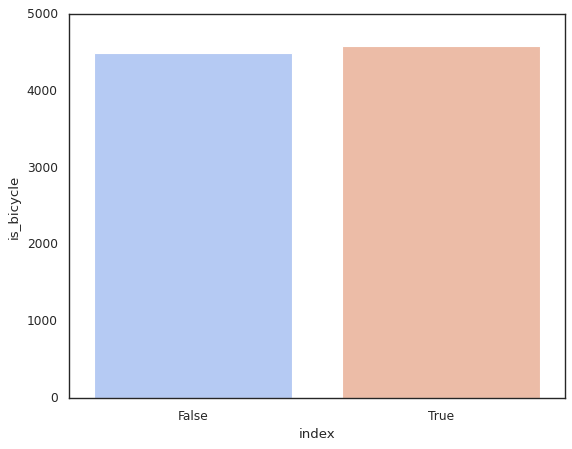

In [43]:
class_counts = ref_df['is_bicycle'].value_counts().to_frame().reset_index()
print(class_counts)
sns.barplot(x='index', y ='is_bicycle', data = class_counts, palette = 'coolwarm')


In [44]:
class_counts_dict = class_counts.to_dict()
print(class_counts_dict)

{'index': {0: True, 1: False}, 'is_bicycle': {0: 4586, 1: 4501}}


In [45]:
print(class_counts_dict['is_bicycle'][0])

4586


In [46]:
ratio_true = round(int(class_counts_dict['is_bicycle'].get(0))/(int(class_counts_dict['is_bicycle'].get(0))+int(class_counts_dict['is_bicycle'].get(1))), 3)
ratio_false = round(int(class_counts_dict['is_bicycle'].get(1))/(int(class_counts_dict['is_bicycle'].get(0))+int(class_counts_dict['is_bicycle'].get(1))), 3)
print('ratio of true values is {}'.format(ratio_true))
print('ratio of false values is {}'.format(ratio_false))


ratio of true values is 0.505
ratio of false values is 0.495


In [47]:
#answer 4
print(new_df['image'].nunique())
print(ref_df['image'].nunique())

9087
9087


In [48]:
print(new_df.shape)
print(new_df.head(30))
print(new_df['image'].value_counts())

(90870, 7)
                          created_at answer  cant_solve  corrupt_data  \
0   2021-02-25T14:08:11.319438+00:00     no       False         False   
1   2021-02-25T13:14:39.411149+00:00     no       False         False   
2   2021-02-25T15:19:57.889434+00:00     no       False         False   
3   2021-02-26T03:56:18.770331+00:00     no       False         False   
4   2021-02-25T15:39:06.644705+00:00     no       False         False   
5   2021-02-25T14:33:18.988785+00:00     no       False         False   
6   2021-02-26T03:36:13.509392+00:00     no       False         False   
7   2021-02-25T14:59:25.687129+00:00     no       False         False   
8   2021-02-25T13:41:59.248481+00:00     no       False         False   
9   2021-02-25T12:12:32.369825+00:00     no       False         False   
10  2021-02-25T13:53:31.698130+00:00    yes       False         False   
11  2021-02-25T15:28:05.979085+00:00    yes       False         False   
12  2021-02-25T13:28:40.359167+00:00    

In [49]:
new_df['image'] = new_df['image'].str.split('.').str[0]
print(new_df['image'].head(10))

0    img_4686
1    img_4686
2    img_4686
3    img_4686
4    img_4686
5    img_4686
6    img_4686
7    img_4686
8    img_4686
9    img_4686
Name: image, dtype: object


In [50]:

image_df = new_df['image'].value_counts().to_frame()
print(image_df.nunique())
print(image_df.image.unique())

image    1
dtype: int64
[10]


In [51]:
ref_df_match_shape = pd.DataFrame(np.repeat(ref_df.values, 10, axis=0))
ref_df_match_shape.columns = ['image', 'is_bicycle']
print(ref_df_match_shape.shape)
print(ref_df_match_shape.head(30))


(90870, 2)
       image is_bicycle
0   img_4686      False
1   img_4686      False
2   img_4686      False
3   img_4686      False
4   img_4686      False
5   img_4686      False
6   img_4686      False
7   img_4686      False
8   img_4686      False
9   img_4686      False
10  img_8607       True
11  img_8607       True
12  img_8607       True
13  img_8607       True
14  img_8607       True
15  img_8607       True
16  img_8607       True
17  img_8607       True
18  img_8607       True
19  img_8607       True
20  img_5541      False
21  img_5541      False
22  img_5541      False
23  img_5541      False
24  img_5541      False
25  img_5541      False
26  img_5541      False
27  img_5541      False
28  img_5541      False
29  img_5541      False


In [53]:
new_df['ref_answer'] = ref_df_match_shape.values[ref_df_match_shape.index,ref_df_match_shape.columns.get_indexer(new_df.image)]

In [54]:
print(new_df.shape)
print(new_df.head(30))

(90870, 8)
                          created_at answer  cant_solve  corrupt_data  \
0   2021-02-25T14:08:11.319438+00:00     no       False         False   
1   2021-02-25T13:14:39.411149+00:00     no       False         False   
2   2021-02-25T15:19:57.889434+00:00     no       False         False   
3   2021-02-26T03:56:18.770331+00:00     no       False         False   
4   2021-02-25T15:39:06.644705+00:00     no       False         False   
5   2021-02-25T14:33:18.988785+00:00     no       False         False   
6   2021-02-26T03:36:13.509392+00:00     no       False         False   
7   2021-02-25T14:59:25.687129+00:00     no       False         False   
8   2021-02-25T13:41:59.248481+00:00     no       False         False   
9   2021-02-25T12:12:32.369825+00:00     no       False         False   
10  2021-02-25T13:53:31.698130+00:00    yes       False         False   
11  2021-02-25T15:28:05.979085+00:00    yes       False         False   
12  2021-02-25T13:28:40.359167+00:00    

In [55]:
from sklearn.metrics import accuracy_score, matthews_corrcoef, precision_score, recall_score, f1_score


In [57]:
new_df_no_nan = new_df.dropna()
print(new_df_no_nan.shape)
new_df_no_nan['answer'] = new_df_no_nan.answer.map({'yes':True, 'no':False})
print(new_df_no_nan.head(10))
print(new_df_no_nan.shape)

(90844, 8)
                         created_at  answer  cant_solve  corrupt_data  \
0  2021-02-25T14:08:11.319438+00:00   False       False         False   
1  2021-02-25T13:14:39.411149+00:00   False       False         False   
2  2021-02-25T15:19:57.889434+00:00   False       False         False   
3  2021-02-26T03:56:18.770331+00:00   False       False         False   
4  2021-02-25T15:39:06.644705+00:00   False       False         False   
5  2021-02-25T14:33:18.988785+00:00   False       False         False   
6  2021-02-26T03:36:13.509392+00:00   False       False         False   
7  2021-02-25T14:59:25.687129+00:00   False       False         False   
8  2021-02-25T13:41:59.248481+00:00   False       False         False   
9  2021-02-25T12:12:32.369825+00:00   False       False         False   

   duration_ms vendor_user_id     image ref_answer  
0        997.0   annotator_12  img_4686      False  
1        845.0   annotator_11  img_4686      False  
2       1468.0   annotator

/tmp/ipykernel_79/2519899152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_no_nan['answer'] = new_df_no_nan.answer.map({'yes':True, 'no':False})


In [58]:
print(new_df_no_nan)

                             created_at  answer  cant_solve  corrupt_data  \
0      2021-02-25T14:08:11.319438+00:00   False       False         False   
1      2021-02-25T13:14:39.411149+00:00   False       False         False   
2      2021-02-25T15:19:57.889434+00:00   False       False         False   
3      2021-02-26T03:56:18.770331+00:00   False       False         False   
4      2021-02-25T15:39:06.644705+00:00   False       False         False   
...                                 ...     ...         ...           ...   
90865  2021-02-25T14:50:17.777598+00:00    True       False         False   
90866  2021-02-26T04:11:29.015906+00:00    True       False         False   
90867  2021-02-25T13:58:18.253317+00:00    True       False         False   
90868  2021-02-25T13:02:51.311501+00:00    True       False         False   
90869  2021-02-25T18:53:40.094173+00:00    True       False         False   

       duration_ms vendor_user_id     image ref_answer  
0            997.0

In [59]:
def compute_annotator_metrics(df, ref_col, metric, min_answers=1):
    annotator_labels = df[['vendor_user_id', 'answer', ref_col]].groupby('vendor_user_id').agg({'answer': list, ref_col: list})
    annotator_metrics = annotator_labels.apply(lambda row: metric(row[ref_col], row.answer) if len(row.answer) >= min_answers else None, axis=1)
    annotator_metrics = annotator_metrics.dropna()
    return annotator_metrics 
annotator_accuracy = compute_annotator_metrics(new_df_no_nan, 'ref_answer', accuracy_score)
annotator_precision = compute_annotator_metrics(new_df_no_nan, 'ref_answer', precision_score)
annotator_recall = compute_annotator_metrics(new_df_no_nan, 'ref_answer', recall_score)
annotator_f1_score = compute_annotator_metrics(new_df_no_nan, 'ref_answer', f1_score)
annotator_mcc = compute_annotator_metrics(new_df_no_nan, 'ref_answer', matthews_corrcoef)
print(annotator_accuracy, annotator_precision, annotator_recall, annotator_f1_score, annotator_mcc)


vendor_user_id
annotator_01    0.948438
annotator_02    0.935080
annotator_03    0.928571
annotator_04    0.928783
annotator_05    0.936978
annotator_06    0.926724
annotator_07    0.915363
annotator_08    0.899602
annotator_09    0.933333
annotator_10    0.888889
annotator_11    0.936441
annotator_12    0.929791
annotator_13    0.946878
annotator_14    0.947216
annotator_15    0.948423
annotator_16    0.942304
annotator_17    0.942037
annotator_18    0.936907
annotator_19    0.945455
annotator_20    0.948408
annotator_21    0.940000
annotator_22    0.944285
dtype: float64 vendor_user_id
annotator_01    0.943536
annotator_02    0.939200
annotator_03    0.955932
annotator_04    0.924013
annotator_05    0.942087
annotator_06    0.901758
annotator_07    0.909735
annotator_08    0.893058
annotator_09    0.922487
annotator_10    0.843750
annotator_11    0.949936
annotator_12    0.913613
annotator_13    0.948527
annotator_14    0.947796
annotator_15    0.957927
annotator_16    0.957848
annot

In [86]:
def combine_frames(list_series):
    list_frames = []
    for series in list_series:
        series_to_frame = series.to_frame()
        list_frames.append(series_to_frame)
    frame = pd.concat(list_frames, axis = 1)
    return frame
metrics_list =[annotator_accuracy, annotator_precision, annotator_recall, annotator_f1_score, annotator_mcc]
annotator_frame_df = combine_frames(metrics_list).reset_index()
annotator_frame_df.columns = ['vendor_user_id','accuracy', 'precision', 'recall', 'F1-score', 'MCC']
annotator_frame_df = annotator_frame_df.round(3)
print(annotator_frame_df.shape)
print(annotator_frame_df.head(10))

(22, 6)
  vendor_user_id  accuracy  precision  recall  F1-score    MCC
0   annotator_01     0.948      0.944   0.958     0.951  0.897
1   annotator_02     0.935      0.939   0.930     0.935  0.870
2   annotator_03     0.929      0.956   0.898     0.926  0.859
3   annotator_04     0.929      0.924   0.939     0.932  0.857
4   annotator_05     0.937      0.942   0.933     0.938  0.874
5   annotator_06     0.927      0.902   0.961     0.930  0.855
6   annotator_07     0.915      0.910   0.926     0.918  0.831
7   annotator_08     0.900      0.893   0.911     0.902  0.799
8   annotator_09     0.933      0.922   0.945     0.934  0.867
9   annotator_10     0.889      0.844   0.970     0.903  0.785


In [87]:
mean_by_annotator = new_df_no_nan.groupby('vendor_user_id')['duration_ms'].mean().round(3)
print(mean_by_annotator)

vendor_user_id
annotator_01    1077.323
annotator_02    1178.242
annotator_03    1460.249
annotator_04    1114.208
annotator_05    1562.089
annotator_06    1496.940
annotator_07    1578.350
annotator_08    1434.716
annotator_09    1198.814
annotator_10    1252.975
annotator_11    1279.975
annotator_12    1306.305
annotator_13    1155.011
annotator_14    1595.577
annotator_15    1365.292
annotator_16    1269.793
annotator_17     991.886
annotator_18    1593.026
annotator_19    1687.776
annotator_20    1173.213
annotator_21    1238.922
annotator_22     880.041
Name: duration_ms, dtype: float64


In [88]:
annotator_frame_df = pd.merge(annotator_frame_df, mean_by_annotator, on = 'vendor_user_id')
print(annotator_frame_df)

   vendor_user_id  accuracy  precision  recall  F1-score    MCC  duration_ms
0    annotator_01     0.948      0.944   0.958     0.951  0.897     1077.323
1    annotator_02     0.935      0.939   0.930     0.935  0.870     1178.242
2    annotator_03     0.929      0.956   0.898     0.926  0.859     1460.249
3    annotator_04     0.929      0.924   0.939     0.932  0.857     1114.208
4    annotator_05     0.937      0.942   0.933     0.938  0.874     1562.089
5    annotator_06     0.927      0.902   0.961     0.930  0.855     1496.940
6    annotator_07     0.915      0.910   0.926     0.918  0.831     1578.350
7    annotator_08     0.900      0.893   0.911     0.902  0.799     1434.716
8    annotator_09     0.933      0.922   0.945     0.934  0.867     1198.814
9    annotator_10     0.889      0.844   0.970     0.903  0.785     1252.975
10   annotator_11     0.936      0.950   0.922     0.936  0.873     1279.975
11   annotator_12     0.930      0.914   0.955     0.934  0.860     1306.305

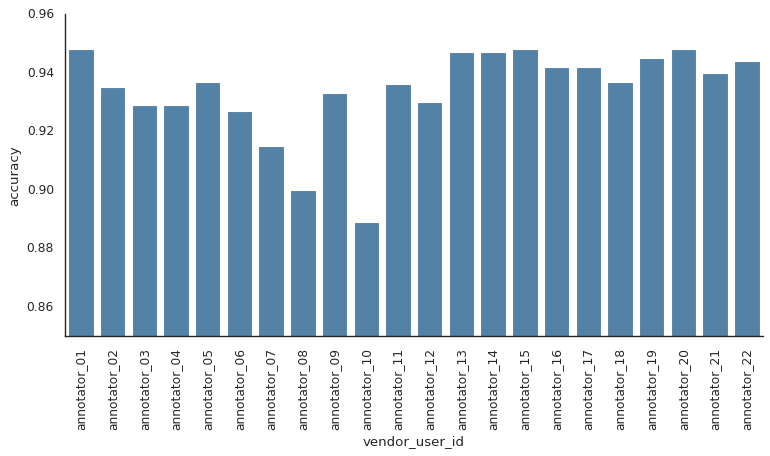

In [90]:
with sns.axes_style('white'):
    g = sns.catplot(x="vendor_user_id", y="accuracy", data=annotator_frame_df, aspect=2,
                       kind = 'bar', color='steelblue')
    g.set_xticklabels(rotation = 90)
    g.ax.set_ylim(0.85, 0.96)

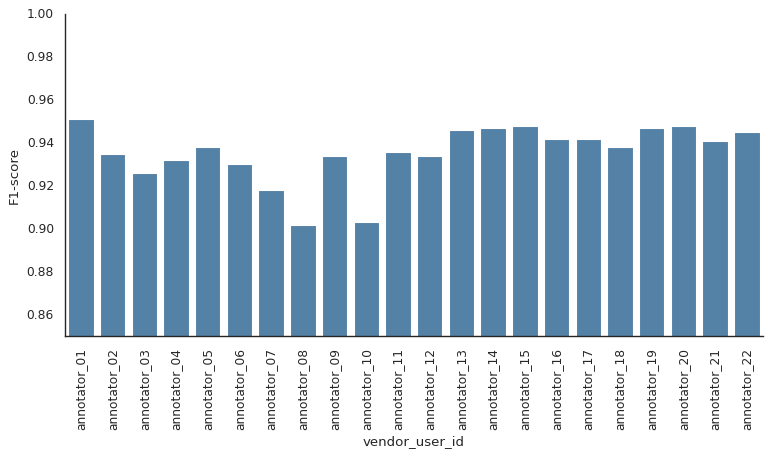

In [91]:
with sns.axes_style('white'):
    g = sns.catplot(x="vendor_user_id", y="F1-score", data=annotator_frame_df, aspect=2,
                       kind = 'bar', color='steelblue')
    g.set_xticklabels(rotation = 90)
    g.ax.set_ylim(0.85, 1)

In [92]:
annotator_frame_df.describe()

,accuracy,precision,recall,F1-score,MCC,duration_ms
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.934000,0.931818,0.940045,0.935591,0.868773,1313.214682
std,0.015418,0.027305,0.017535,0.013394,0.030166,215.766993
min,0.889000,0.844000,0.898000,0.902000,0.785000,880.041000
25%,0.929250,0.922000,0.927750,0.932500,0.859250,1174.470250
50%,0.937000,0.940500,0.944500,0.938000,0.874000,1274.884000
75%,0.944750,0.948750,0.952750,0.945750,0.890500,1487.767250
max,0.948000,0.963000,0.970000,0.951000,0.897000,1687.776000


In [93]:
import plotly_express as px
fig = px.bar(annotator_frame_df, x = 'vendor_user_id', y=['accuracy', 'F1-score'], barmode='overlay')
fig.update_layout(yaxis_range=[0.88, 0.96])
fig.show(renderer='iframe')

In [94]:
annotators_task_number = new_df['vendor_user_id'].value_counts().to_frame().reset_index()
annotators_task_number.columns = ['vendor_user_id', 'count']
annotators_task_number['vendor_user_id'] = annotators_task_number['vendor_user_id'].sort_values(ascending = True)
print(annotators_task_number)
annotators_df = pd.merge(annotator_frame_df, annotators_task_number, on = 'vendor_user_id')
print(annotators_df)

   


   vendor_user_id  count
0    annotator_02   7596
1    annotator_13   7078
2    annotator_08   6537
3    annotator_11   6436
4    annotator_04   6421
5    annotator_12   6210
6    annotator_20   6126
7    annotator_15   6088
8    annotator_06   5337
9    annotator_18   5170
10   annotator_16   5061
11   annotator_09   4860
12   annotator_17   3485
13   annotator_05   3475
14   annotator_21   2950
15   annotator_07   2175
16   annotator_22   1745
17   annotator_14   1725
18   annotator_01   1280
19   annotator_03    630
20   annotator_10    315
21   annotator_19    170
   vendor_user_id  accuracy  precision  recall  F1-score    MCC  duration_ms  \
0    annotator_01     0.948      0.944   0.958     0.951  0.897     1077.323   
1    annotator_02     0.935      0.939   0.930     0.935  0.870     1178.242   
2    annotator_03     0.929      0.956   0.898     0.926  0.859     1460.249   
3    annotator_04     0.929      0.924   0.939     0.932  0.857     1114.208   
4    annotator_05     0.9

In [95]:
annotators_df.rename(columns={'duration_ms':'duration_mean_ms'}, inplace = True)
print(annotators_df)                    

   vendor_user_id  accuracy  precision  recall  F1-score    MCC  \
0    annotator_01     0.948      0.944   0.958     0.951  0.897   
1    annotator_02     0.935      0.939   0.930     0.935  0.870   
2    annotator_03     0.929      0.956   0.898     0.926  0.859   
3    annotator_04     0.929      0.924   0.939     0.932  0.857   
4    annotator_05     0.937      0.942   0.933     0.938  0.874   
5    annotator_06     0.927      0.902   0.961     0.930  0.855   
6    annotator_07     0.915      0.910   0.926     0.918  0.831   
7    annotator_08     0.900      0.893   0.911     0.902  0.799   
8    annotator_09     0.933      0.922   0.945     0.934  0.867   
9    annotator_10     0.889      0.844   0.970     0.903  0.785   
10   annotator_11     0.936      0.950   0.922     0.936  0.873   
11   annotator_12     0.930      0.914   0.955     0.934  0.860   
12   annotator_13     0.947      0.949   0.944     0.946  0.894   
13   annotator_14     0.947      0.948   0.947     0.947  0.89

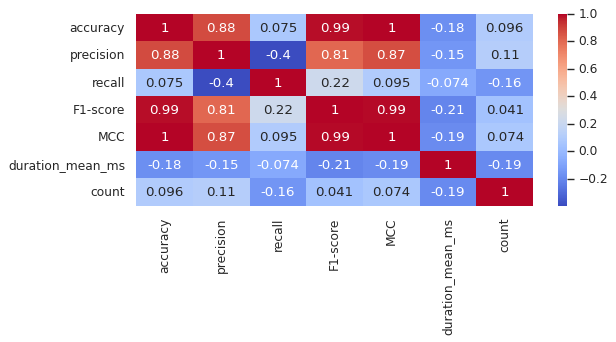

In [96]:
plt.figure(figsize=(8,3))
sns.set_theme(style="white")
corr = annotators_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm")

In [83]:
print(annotators_df.describe().round(3))

       accuracy  precision  recall  F1-score     MCC  duration_mean_ms  \
count    22.000     22.000  22.000    22.000  22.000            22.000   
mean      0.934      0.932   0.940     0.936   0.869          1313.215   
std       0.016      0.027   0.017     0.013   0.030           215.767   
min       0.889      0.844   0.898     0.902   0.785           880.041   
25%       0.929      0.922   0.928     0.932   0.859          1174.470   
50%       0.937      0.941   0.945     0.938   0.874          1274.884   
75%       0.945      0.948   0.953     0.946   0.890          1487.767   
max       0.948      0.963   0.970     0.951   0.897          1687.776   

          count  
count    22.000  
mean   4130.455  
std    2403.234  
min     170.000  
25%    1852.500  
50%    4960.500  
75%    6189.000  
max    7596.000  


In [84]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

annotators_df.style.background_gradient(cmap=cm)

,vendor_user_id,accuracy,precision,recall,F1-score,MCC,duration_mean_ms,count
0,annotator_01,0.948438,0.943536,0.957768,0.950599,0.896793,1077.323437,1280
1,annotator_02,0.935080,0.939200,0.930024,0.934589,0.870198,1178.241506,7596
2,annotator_03,0.928571,0.955932,0.898089,0.926108,0.858678,1460.249206,630
3,annotator_04,0.928783,0.924013,0.939348,0.931618,0.857458,1114.208041,6421
4,annotator_05,0.936978,0.942087,0.932993,0.937518,0.873992,1562.089209,3475
5,annotator_06,0.926724,0.901758,0.961058,0.930464,0.855122,1496.940217,5337
6,annotator_07,0.915363,0.909735,0.926126,0.917857,0.830726,1578.350046,2175
7,annotator_08,0.899602,0.893058,0.911366,0.902119,0.799266,1434.715794,6537
8,annotator_09,0.933333,0.922487,0.945387,0.933796,0.866945,1198.814198,4860
9,annotator_10,0.888889,0.843750,0.970060,0.902507,0.785025,1252.974603,315


In [99]:
# quick check that subset of questions for each annotator is balanced
annotator_subset_ref_df = new_df.groupby('vendor_user_id')['ref_answer'].value_counts()
print(annotator_subset_ref_df)
annotator_subset_answers_df = new_df.groupby('vendor_user_id')['answer'].value_counts()
print(annotator_subset_answers_df)

vendor_user_id  ref_answer
annotator_01    True           663
                False          617
annotator_02    False         3807
                True          3789
annotator_03    False          316
                True           314
annotator_04    True          3317
                False         3104
annotator_05    True          1761
                False         1714
annotator_06    True          2723
                False         2614
annotator_07    True          1110
                False         1065
annotator_08    True          3319
                False         3218
annotator_09    False         2443
                True          2417
annotator_10    True           167
                False          148
annotator_11    True          3231
                False         3205
annotator_12    True          3213
                False         2997
annotator_13    False         3565
                True          3513
annotator_14    True           864
                False       

In [102]:
#calculate sample size which should be sufficient to calculate accuracy with 95% confidence and 5% margin of error, variance as 0.5
sample_size = (1.96*1.96*0.5*(1-0.5)/(0.05*0.05))/(1+(1.96*1.96*0.5*(1-0.5)/(0.5*0.5*9087)))
print(sample_size)

383.99766199864257
